<a href="https://colab.research.google.com/github/Tonmf/ProyectoIML/blob/master/Casos/Caso_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reporte de MLT de Barcelona Telco

##Caso 1:Casas en Ames, Iowa

1.-Generar un modelo que sea capaz de predecir el precio de las casas dadas sus características. 

2.-Simplificar el modelo con menos datos de entrada y usar aquellos importantes para un empleado y dadas las limitaciones.


## Data

In [ ]:
import os              # Package to use directory command to list files
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # Used for plotting the graph
import matplotlib.pyplot as plt
import re

from scipy import stats # for Statistics
from statistics import mean
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/Final%20Project/datasets/Ames%20Housing%20Price/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/sergiakalorth/MachineLearning-CIM-UPC/master/Final%20Project/datasets/Ames%20Housing%20Price/test.csv')
# To check the data since it can have issues
# Do not train with this!
df = data.append(test, sort = False)
print(df.shape)
df.head(10)

(2919, 81)


Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal  208500.0
1   2          20       RL  ...        WD         Normal  181500.0
2   3          60       RL  ...        WD         Normal  223500.0
3   4          70       RL  ...        WD        Abnorml  140000.0
4   5          60       RL  ...        WD         Normal  250000.0
5   6          50       RL  ...        WD         Normal  143000.0
6   7          20       RL  ...        WD         Normal  307000.0
7   8          60       RL  ...        WD         Normal  200000.0
8   9          50       RM  ...        WD        Abnorml  129900.0
9  10         190       RL  ...        WD         Normal  118000.0

[10 rows x 81 columns]

## Data Exploration

In [ ]:
data.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [ ]:
totalt = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
PoolQC          2909  0.996574
MiscFeature     2814  0.964029
Alley           2721  0.932169
Fence           2348  0.804385
SalePrice       1459  0.499829
...              ...       ...
CentralAir         0  0.000000
SaleCondition      0  0.000000
Heating            0  0.000000
Foundation         0  0.000000
Id                 0  0.000000

[81 rows x 2 columns]

In [ ]:
missing=missing_data.loc[(missing_data['Total']>0)]
missing

Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
SalePrice      1459  0.499829
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageQual      159  0.054471
GarageYrBlt     159  0.054471
GarageFinish    159  0.054471
GarageCond      159  0.054471
GarageType      157  0.053786
BsmtExposure     82  0.028092
BsmtCond         82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
Utilities         2  0.000685
Functional        2  0.000685
BsmtFullBath      2  0.000685
BsmtHalfBath      2  0.000685
GarageArea        1  0.000343
BsmtFinSF2        1  0.000343
Exterior1st       1  0.000343
TotalBsmtSF       1  0.000343
GarageCars        1  0.000343
BsmtUnfSF         1  0.000343
Electrical        1  0.000343
BsmtFinSF1        1  0.000343
KitchenQual       1  0.000343
SaleType          1  0.000343
Exterior2nd       1  0.000343

In [ ]:
df['SalePrice'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1454     True
1455     True
1456     True
1457     True
1458     True
Name: SalePrice, Length: 2919, dtype: bool

In [ ]:
df_dropped=df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [ ]:
df_dropped

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal  208500.0
1        2          20       RL  ...        WD         Normal  181500.0
2        3          60       RL  ...        WD         Normal  223500.0
3        4          70       RL  ...        WD        Abnorml  140000.0
4        5          60       RL  ...        WD         Normal  250000.0
...    ...         ...      ...  ...       ...            ...       ...
1454  2915         160       RM  ...        WD         Normal       NaN
1455  2916         160       RM  ...        WD        Abnorml       NaN
1456  2917          20       RL  ...        WD        Abnorml       NaN
1457  2918          85       RL  ...        WD         Normal       NaN
1458  2919          60       RL  ...        WD         Normal       NaN

[2919 rows x 77 columns]

In [ ]:
df_Sales=df_dropped.loc[df_dropped['SalePrice'].isnull()== False]
df_Sales

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal  208500.0
1        2          20       RL  ...        WD         Normal  181500.0
2        3          60       RL  ...        WD         Normal  223500.0
3        4          70       RL  ...        WD        Abnorml  140000.0
4        5          60       RL  ...        WD         Normal  250000.0
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal  175000.0
1456  1457          20       RL  ...        WD         Normal  210000.0
1457  1458          70       RL  ...        WD         Normal  266500.0
1458  1459          20       RL  ...        WD         Normal  142125.0
1459  1460          20       RL  ...        WD         Normal  147500.0

[1460 rows x 77 columns]

In [ ]:
totalt = df_Sales.isnull().sum().sort_values(ascending=False)
percent = (df_Sales.isnull().sum()/df_Sales.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing=missing_data2.loc[(missing_data2['Total']>0)]
missing

Total   Percent
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageCond       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrType        8  0.005479
MasVnrArea        8  0.005479
Electrical        1  0.000685

In [ ]:
df_Sales['FireplaceQu'].loc[(df_Sales['FireplaceQu'].isnull()==False)]

1       TA
2       TA
3       Gd
4       TA
6       Gd
        ..
1447    TA
1451    Gd
1455    TA
1456    TA
1457    Gd
Name: FireplaceQu, Length: 770, dtype: object

In [ ]:
df_Sales['FireplaceQu'].loc[(df_Sales['FireplaceQu']!="TA") & (df_Sales['FireplaceQu']!="Gd") & (df_Sales['FireplaceQu'].isnull()==False)& (df_Sales['FireplaceQu']!="Fa")& (df_Sales['FireplaceQu']!="Ex")& (df_Sales['FireplaceQu']!="Po")]

Series([], Name: FireplaceQu, dtype: object)

In [ ]:
A=df_Sales.loc[(df_Sales['FireplaceQu'].isnull()==True)].shape
A

(690, 77)

In [ ]:
B=df_Sales.loc[(df_Sales['Fireplaces']==0)].shape
B

(690, 77)

In [ ]:
df_Sales['FireplaceQu']=df_Sales['FireplaceQu'].fillna('No')
df_Sales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal  208500.0
1        2          20       RL  ...        WD         Normal  181500.0
2        3          60       RL  ...        WD         Normal  223500.0
3        4          70       RL  ...        WD        Abnorml  140000.0
4        5          60       RL  ...        WD         Normal  250000.0
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal  175000.0
1456  1457          20       RL  ...        WD         Normal  210000.0
1457  1458          70       RL  ...        WD         Normal  266500.0
1458  1459          20       RL  ...        WD         Normal  142125.0
1459  1460          20       RL  ...        WD         Normal  147500.0

[1460 rows x 77 columns]

In [ ]:
totalt = df_Sales.isnull().sum().sort_values(ascending=False)
percent = (df_Sales.isnull().sum()/df_Sales.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing=missing_data2.loc[(missing_data2['Total']>0)]
missing

Total   Percent
LotFrontage     259  0.177397
GarageFinish     81  0.055479
GarageType       81  0.055479
GarageCond       81  0.055479
GarageQual       81  0.055479
GarageYrBlt      81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrType        8  0.005479
MasVnrArea        8  0.005479
Electrical        1  0.000685

In [ ]:
df_Sales['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
df_Sales.loc[df_Sales['LotFrontage']<21]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [ ]:
df_Sales['LotFrontage']=df_Sales['LotFrontage'].fillna(0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_Sales.loc[df_Sales['LotFrontage']<21]

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
7        8          60       RL  ...        WD         Normal  200000.0
12      13          20       RL  ...        WD         Normal  144000.0
14      15          20       RL  ...        WD         Normal  157000.0
16      17          20       RL  ...        WD         Normal  149000.0
24      25          20       RL  ...        WD         Normal  154000.0
...    ...         ...      ...  ...       ...            ...       ...
1429  1430          20       RL  ...        WD         Normal  182900.0
1431  1432         120       RL  ...        WD         Normal  143750.0
1441  1442         120       RM  ...        WD         Normal  149300.0
1443  1444          30       RL  ...        WD         Normal  121000.0
1446  1447          20       RL  ...        WD         Normal  157900.0

[259 rows x 77 columns]

In [ ]:
df_Sales['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [ ]:
totalt = df_Sales.isnull().sum().sort_values(ascending=False)
percent = (df_Sales.isnull().sum()/df_Sales.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing=missing_data2.loc[(missing_data2['Total']>0)]
missing

Total   Percent
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageCond       81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrType        8  0.005479
MasVnrArea        8  0.005479
Electrical        1  0.000685

In [ ]:
df_Sales['GarageType']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

In [ ]:
df_Sales['GarageType'].loc[(df_Sales['GarageType']!="Attchd") & (df_Sales['GarageType']!="Detchd")& (df_Sales['GarageType']!="BuiltIn")& (df_Sales['GarageType']!="CarPort")& (df_Sales['GarageType']!="Basment")& (df_Sales['GarageType']!="2Types")]

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
       ... 
1349    NaN
1407    NaN
1449    NaN
1450    NaN
1453    NaN
Name: GarageType, Length: 81, dtype: object

In [ ]:
df_Sales.loc[df_Sales['GarageType'].isnull()==True] 

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
39      40          90       RL  ...        WD        AdjLand   82000.0
48      49         190       RM  ...       New        Partial  113000.0
78      79          90       RL  ...        WD         Normal  136500.0
88      89          50  C (all)  ...     ConLD        Abnorml   85000.0
89      90          20       RL  ...        WD         Normal  123600.0
...    ...         ...      ...  ...       ...            ...       ...
1349  1350          70       RM  ...        WD         Normal  122000.0
1407  1408          20       RL  ...        WD         Normal  112000.0
1449  1450         180       RM  ...        WD        Abnorml   92000.0
1450  1451          90       RL  ...        WD         Normal  136000.0
1453  1454          20       RL  ...        WD        Abnorml   84500.0

[81 rows x 77 columns]

In [ ]:
df_Sales['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [ ]:
df_Sales['GarageFinish']

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

In [ ]:
df_Sales['GarageFinish'].loc[(df_Sales['GarageFinish']!="RFn") & (df_Sales['GarageFinish']!="Fin")& (df_Sales['GarageFinish']!="Unf")]

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
       ... 
1349    NaN
1407    NaN
1449    NaN
1450    NaN
1453    NaN
Name: GarageFinish, Length: 81, dtype: object

In [ ]:
df_Sales['GarageCond']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

In [ ]:
df_Sales['GarageCond'].loc[(df_Sales['GarageCond']!="TA")&(df_Sales['GarageCond']!="Fa")&(df_Sales['GarageCond']!="Gd")&(df_Sales['GarageCond']!="Po")&(df_Sales['GarageCond']!="Ex")]

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
       ... 
1349    NaN
1407    NaN
1449    NaN
1450    NaN
1453    NaN
Name: GarageCond, Length: 81, dtype: object

In [ ]:
df_Sales['GarageQual']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1460, dtype: object

In [ ]:
df_Sales['GarageQual'].loc[(df_Sales['GarageQual']!="TA")&(df_Sales['GarageQual']!="Fa")&(df_Sales['GarageQual']!="Gd")&(df_Sales['GarageQual']!="Po")&(df_Sales['GarageQual']!="Ex")]

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
       ... 
1349    NaN
1407    NaN
1449    NaN
1450    NaN
1453    NaN
Name: GarageQual, Length: 81, dtype: object

In [ ]:
df_Sales['GarageType']=df_Sales['GarageType'].fillna("None")
df_Sales['GarageYrBlt']=df_Sales['GarageYrBlt'].fillna(0.0)
df_Sales['GarageFinish']=df_Sales['GarageFinish'].fillna("None")
df_Sales['GarageCond']=df_Sales['GarageCond'].fillna("No")
df_Sales['GarageQual']=df_Sales['GarageQual'].fillna("No")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
totalt = df_Sales.isnull().sum().sort_values(ascending=False)
percent = (df_Sales.isnull().sum()/df_Sales.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing=missing_data2.loc[(missing_data2['Total']>0)]
missing

Total   Percent
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
MasVnrType        8  0.005479
MasVnrArea        8  0.005479
Electrical        1  0.000685

In [ ]:
df_Sales['BsmtFinType2']

0       Unf
1       Unf
2       Unf
3       Unf
4       Unf
       ... 
1455    Unf
1456    Rec
1457    Unf
1458    Rec
1459    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object

In [ ]:
df_Sales['BsmtFinType2'].loc[(df_Sales['BsmtFinType2']!="Unf")&(df_Sales['BsmtFinType2']!="Rec")&(df_Sales['BsmtFinType2']!="BLQ")&(df_Sales['BsmtFinType2']!="ALQ")&(df_Sales['BsmtFinType2']!="LwQ")&(df_Sales['BsmtFinType2']!="GLQ")].shape

(38,)

In [ ]:
df_Sales['BsmtExposure']

0       No
1       Gd
2       Mn
3       No
4       Av
        ..
1455    No
1456    No
1457    No
1458    Mn
1459    No
Name: BsmtExposure, Length: 1460, dtype: object

In [ ]:
df_Sales['BsmtExposure'].loc[(df_Sales['BsmtExposure']!="Gd")&(df_Sales['BsmtExposure']!="Av")&(df_Sales['BsmtExposure']!="No")&(df_Sales['BsmtExposure']!="Mn")].shape

(38,)

In [ ]:
df_Sales['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [ ]:
df_Sales['BsmtQual'].loc[(df_Sales['BsmtQual']!="TA")&(df_Sales['BsmtQual']!="Ex")&(df_Sales['BsmtQual']!="Fa")&(df_Sales['BsmtQual']!="Gd")].shape

(37,)

In [ ]:
df_Sales['BsmtFinType1']

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1460, dtype: object

In [ ]:
df_Sales['BsmtFinType1'].loc[(df_Sales['BsmtFinType1']!="GLQ")&(df_Sales['BsmtFinType1']!="ALQ")&(df_Sales['BsmtFinType1']!="Unf")&(df_Sales['BsmtFinType1']!="BLQ")&(df_Sales['BsmtFinType1']!="Rec")&(df_Sales['BsmtFinType1']!="LwQ")].shape

(37,)

In [ ]:
df_Sales['BsmtCond']

0       TA
1       TA
2       TA
3       Gd
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: BsmtCond, Length: 1460, dtype: object

In [ ]:
df_Sales['BsmtCond'].loc[(df_Sales['BsmtCond']!="TA")&(df_Sales['BsmtCond']!="Ex")&(df_Sales['BsmtCond']!="Fa")&(df_Sales['BsmtCond']!="Gd")&(df_Sales['BsmtCond']!="Po")].shape

(37,)

In [ ]:
df_Sales['BsmtFinType2']=df_Sales['BsmtFinType2'].fillna("None")
df_Sales['BsmtExposure']=df_Sales['BsmtExposure'].fillna("None")
df_Sales['BsmtQual']=df_Sales['BsmtQual'].fillna("None")
df_Sales['BsmtFinType1']=df_Sales['BsmtFinType1'].fillna("None")
df_Sales['BsmtCond']=df_Sales['BsmtCond'].fillna("None")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
totalt = df_Sales.isnull().sum().sort_values(ascending=False)
percent = (df_Sales.isnull().sum()/df_Sales.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing=missing_data2.loc[(missing_data2['Total']>0)]
missing

Total   Percent
MasVnrType      8  0.005479
MasVnrArea      8  0.005479
Electrical      1  0.000685

In [ ]:
df_Sales.loc[df_Sales['MasVnrType'].isnull()==True]

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
234    235          60       RL  ...        WD         Normal  216500.0
529    530          20       RL  ...        WD         Alloca  200624.0
650    651          60       FV  ...        WD         Normal  205950.0
936    937          20       RL  ...        WD         Normal  184900.0
973    974          20       FV  ...       New        Partial  182000.0
977    978         120       FV  ...       New        Partial  199900.0
1243  1244          20       RL  ...       New        Partial  465000.0
1278  1279          60       RL  ...        WD         Normal  237000.0

[8 rows x 77 columns]

In [ ]:
df_Sales.loc[df_Sales['MasVnrType'].isnull()==False]

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal  208500.0
1        2          20       RL  ...        WD         Normal  181500.0
2        3          60       RL  ...        WD         Normal  223500.0
3        4          70       RL  ...        WD        Abnorml  140000.0
4        5          60       RL  ...        WD         Normal  250000.0
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal  175000.0
1456  1457          20       RL  ...        WD         Normal  210000.0
1457  1458          70       RL  ...        WD         Normal  266500.0
1458  1459          20       RL  ...        WD         Normal  142125.0
1459  1460          20       RL  ...        WD         Normal  147500.0

[1452 rows x 77 columns]

In [ ]:
df_Sales['MasVnrType']=df_Sales['MasVnrType'].fillna("None")
df_Sales['MasVnrArea']=df_Sales['MasVnrArea'].fillna(0.0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_Sales.loc[df_Sales['Id']== 937]

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
936  937          20       RL  ...        WD         Normal  184900.0

[1 rows x 77 columns]

In [ ]:
totalt = df_Sales.isnull().sum().sort_values(ascending=False)
percent = (df_Sales.isnull().sum()/df_Sales.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing=missing_data2.loc[(missing_data2['Total']>0)]
missing

Total   Percent
Electrical      1  0.000685

In [ ]:
df_Sales.loc[df_Sales['Electrical'].isnull()==True]

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
1379  1380          80       RL  ...        WD         Normal  167500.0

[1 rows x 77 columns]

In [ ]:
df_Sales.loc[df_Sales['Electrical'].isnull()==False]

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal  208500.0
1        2          20       RL  ...        WD         Normal  181500.0
2        3          60       RL  ...        WD         Normal  223500.0
3        4          70       RL  ...        WD        Abnorml  140000.0
4        5          60       RL  ...        WD         Normal  250000.0
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal  175000.0
1456  1457          20       RL  ...        WD         Normal  210000.0
1457  1458          70       RL  ...        WD         Normal  266500.0
1458  1459          20       RL  ...        WD         Normal  142125.0
1459  1460          20       RL  ...        WD         Normal  147500.0

[1459 rows x 77 columns]

In [ ]:
df_Sales['Electrical']

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [ ]:
df_Sales.loc[df_Sales['Electrical']=="SBrkr"].shape

(1334, 77)

In [ ]:
df_Sales.loc[df_Sales['Electrical']=="FuseA"].shape

(94, 77)

In [ ]:
df_Sales.loc[df_Sales['Electrical']=="FuseF"].shape

(27, 77)

In [ ]:
df_Sales.loc[df_Sales['Electrical']=="FuseP"].shape

(3, 77)

In [ ]:
df_Sales.loc[df_Sales['Electrical']=="Mix"].shape

(1, 77)

In [ ]:
df_Sales.loc[(df_Sales['Electrical']!="FuseA") & (df_Sales['Electrical']!="SBrkr")& (df_Sales['Electrical']!="FuseF")& (df_Sales['Electrical']!="FuseP")]

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
398    399          30       RM  ...        WD        Abnorml   67000.0
1379  1380          80       RL  ...        WD         Normal  167500.0

[2 rows x 77 columns]

In [ ]:
1334+94+27+3+1

1459

In [ ]:
df_Sales['Electrical']=df_Sales['Electrical'].fillna("SBrkr")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
totalt = df_Sales.isnull().sum().sort_values(ascending=False)
percent = (df_Sales.isnull().sum()/df_Sales.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing=missing_data2.loc[(missing_data2['Total']>0)]
missing

Empty DataFrame
Columns: [Total, Percent]
Index: []

In [ ]:
df=df_Sales

Visualización del dato

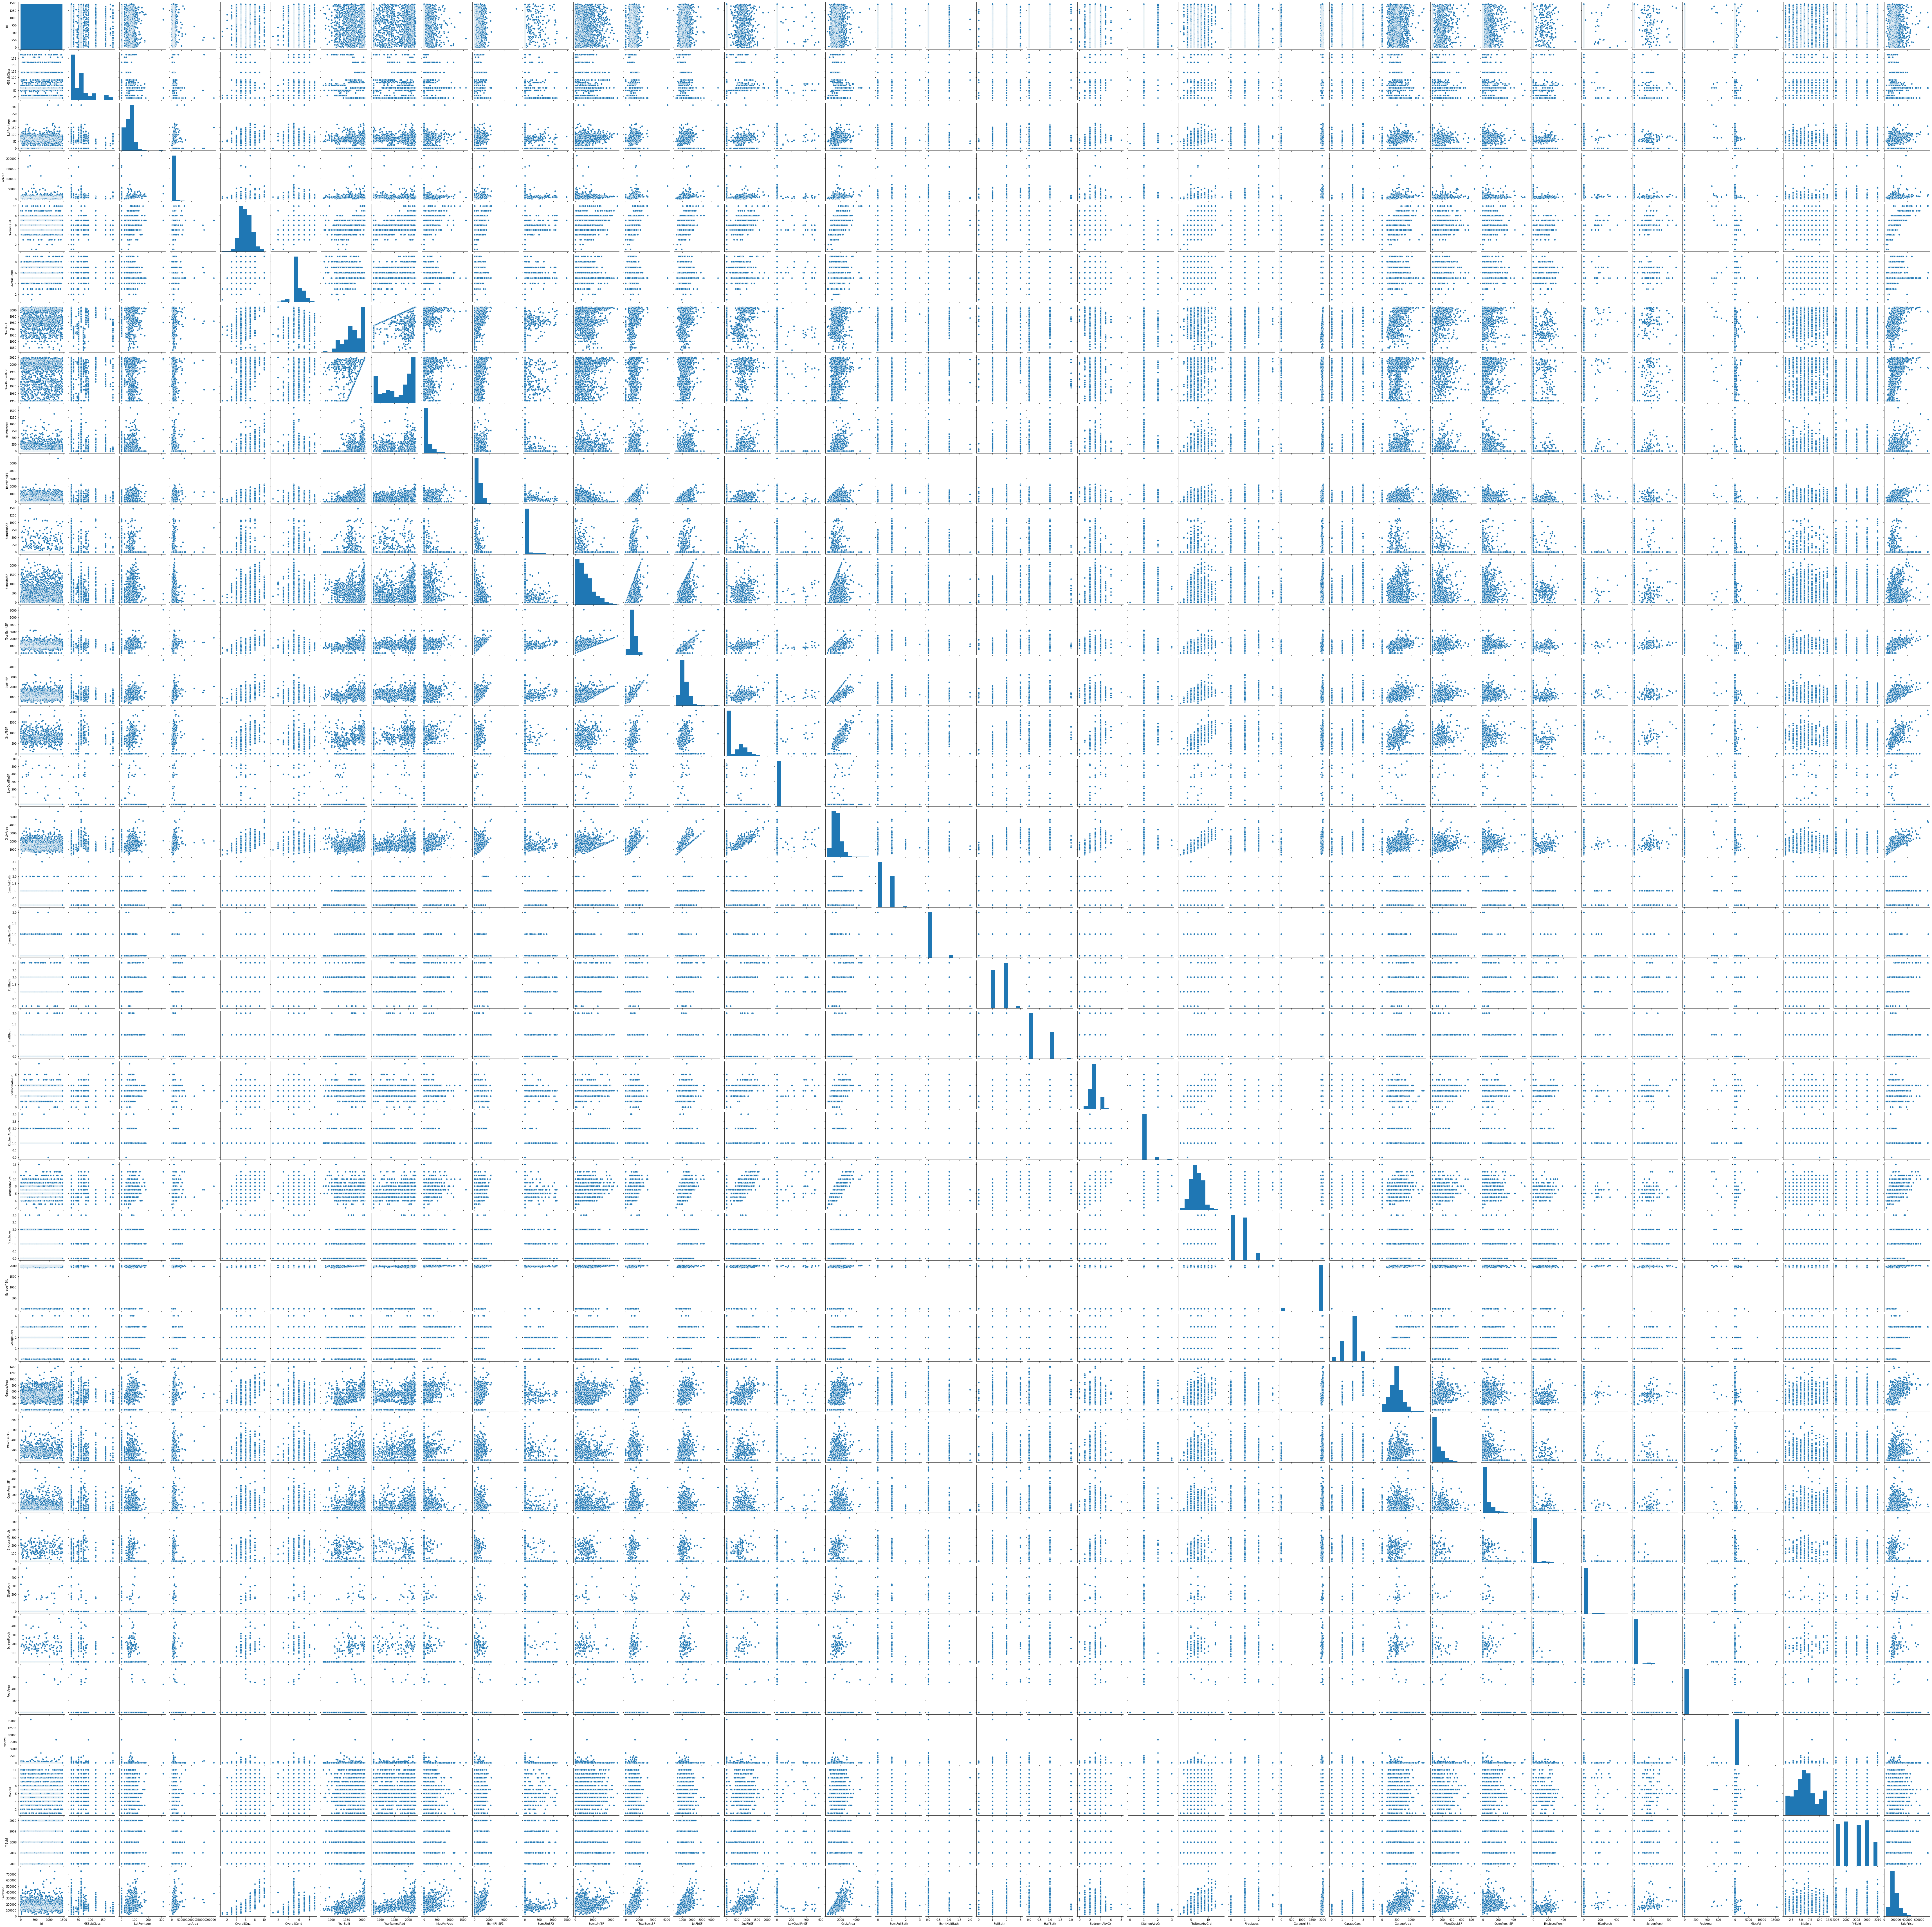

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [ ]:
df1=df.select_dtypes(include='object')
df1.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df['MSZoning'].astype(str))  
df['MSZoning'] = le.transform(df['MSZoning'].astype(str))

le.fit(df['Street'].astype(str))  
df['Street'] = le.transform(df['Street'].astype(str))

le.fit(df['LotShape'].astype(str))  
df['LotShape'] = le.transform(df['LotShape'].astype(str))

le.fit(df['LandContour'].astype(str))  
df['LandContour'] = le.transform(df['LandContour'].astype(str))

le.fit(df['Utilities'].astype(str))  
df['Utilities'] = le.transform(df['Utilities'].astype(str))

le.fit(df['LotConfig'].astype(str))  
df['LotConfig'] = le.transform(df['LotConfig'].astype(str))

le.fit(df['LandSlope'].astype(str))  
df['LandSlope'] = le.transform(df['LandSlope'].astype(str))

le.fit(df['Neighborhood'].astype(str))  
df['Neighborhood'] = le.transform(df['Neighborhood'].astype(str))

le.fit(df['Condition1'].astype(str))  
df['Condition1'] = le.transform(df['Condition1'].astype(str))

le.fit(df['Condition2'].astype(str))  
df['Condition2'] = le.transform(df['Condition2'].astype(str))

le.fit(df['BldgType'].astype(str))  
df['BldgType'] = le.transform(df['BldgType'].astype(str))

le.fit(df['HouseStyle'].astype(str))  
df['HouseStyle'] = le.transform(df['HouseStyle'].astype(str))

le.fit(df['RoofStyle'].astype(str))  
df['RoofStyle'] = le.transform(df['RoofStyle'].astype(str))

le.fit(df['RoofMatl'].astype(str))  
df['RoofMatl'] = le.transform(df['RoofMatl'].astype(str))

le.fit(df['Exterior1st'].astype(str))  
df['Exterior1st'] = le.transform(df['Exterior1st'].astype(str))

le.fit(df['Exterior2nd'].astype(str))  
df['Exterior2nd'] = le.transform(df['Exterior2nd'].astype(str))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df1=df.select_dtypes(include='object')
df1.columns

Index(['MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df['MasVnrType'].astype(str))  
df['MasVnrType'] = le.transform(df['MasVnrType'].astype(str))

le.fit(df['ExterQual'].astype(str))  
df['ExterQual'] = le.transform(df['ExterQual'].astype(str))

le.fit(df['ExterCond'].astype(str))  
df['ExterCond'] = le.transform(df['ExterCond'].astype(str))

le.fit(df['Foundation'].astype(str))  
df['Foundation'] = le.transform(df['Foundation'].astype(str))

le.fit(df['BsmtQual'].astype(str))  
df['BsmtQual'] = le.transform(df['BsmtQual'].astype(str))

le.fit(df['BsmtCond'].astype(str))  
df['BsmtCond'] = le.transform(df['BsmtCond'].astype(str))

le.fit(df['BsmtExposure'].astype(str))  
df['BsmtExposure'] = le.transform(df['BsmtExposure'].astype(str))

le.fit(df['BsmtFinType1'].astype(str))  
df['BsmtFinType1'] = le.transform(df['BsmtFinType1'].astype(str))

le.fit(df['BsmtFinType2'].astype(str))  
df['BsmtFinType2'] = le.transform(df['BsmtFinType2'].astype(str))

le.fit(df['Heating'].astype(str))  
df['Heating'] = le.transform(df['Heating'].astype(str))

le.fit(df['HeatingQC'].astype(str))  
df['HeatingQC'] = le.transform(df['HeatingQC'].astype(str))

le.fit(df['CentralAir'].astype(str))  
df['CentralAir'] = le.transform(df['CentralAir'].astype(str))

le.fit(df['BsmtCond'].astype(str))  
df['BsmtCond'] = le.transform(df['BsmtCond'].astype(str))

le.fit(df['BsmtExposure'].astype(str))  
df['BsmtExposure'] = le.transform(df['BsmtExposure'].astype(str))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df['Electrical'].astype(str))  
df['Electrical'] = le.transform(df['Electrical'].astype(str))

le.fit(df['KitchenQual'].astype(str))  
df['KitchenQual'] = le.transform(df['KitchenQual'].astype(str))

le.fit(df['Functional'].astype(str))  
df['Functional'] = le.transform(df['Functional'].astype(str))

le.fit(df['FireplaceQu'].astype(str))  
df['FireplaceQu'] = le.transform(df['FireplaceQu'].astype(str))

le.fit(df['GarageType'].astype(str))  
df['GarageType'] = le.transform(df['GarageType'].astype(str))

le.fit(df['GarageFinish'].astype(str))  
df['GarageFinish'] = le.transform(df['GarageFinish'].astype(str))

le.fit(df['GarageQual'].astype(str))  
df['GarageQual'] = le.transform(df['GarageQual'].astype(str))

le.fit(df['GarageCond'].astype(str))  
df['GarageCond'] = le.transform(df['GarageCond'].astype(str))

le.fit(df['PavedDrive'].astype(str))  
df['PavedDrive'] = le.transform(df['PavedDrive'].astype(str))

le.fit(df['SaleType'].astype(str))  
df['SaleType'] = le.transform(df['SaleType'].astype(str))

le.fit(df['SaleCondition'].astype(str))  
df['SaleCondition'] = le.transform(df['SaleCondition'].astype(str))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df1=df.select_dtypes(include='number')
df1.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
SalePrice        float64
Length: 77, dtype: object

In [ ]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

Una vez el dataset esta limpio procedemos a hacer el algoritmo de machine learning

##Algoritmo de Machine Learning

###Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
target = df['SalePrice'].values

select_features = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']


scaler = StandardScaler()
dfScaled = scaler.fit_transform(df[select_features])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfScaled, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # importing model to use for our prediction
from sklearn.metrics import classification_report
#n_estimators: Numero de arboles del randomforest.
#mas_depth: Profindidad maxima de los arboles.
#min_samples_split:El número mínimo de muestras necesarias para dividir un nodo interno
RFC = RandomForestClassifier(max_depth = 16, min_samples_split = 2, n_estimators = 18,random_state = 20, n_jobs = -1)
RFC.fit(x_train, y_train) 
train_prediction = RFC.predict(x_train)
print("La accuracy es de {}.".format(accuracy_score(y_train,train_prediction)))
#print(classification_report(y_train, train_prediction))

La accuracy es de 0.9272260273972602.


##Resultados

EL mejor classificador en este caso es el random Forest con una precisión del 92.72%

##Caracteristicas más importantes

###PCA

In [ ]:
x=df[select_features]
y=df['SalePrice']

print('x shape:{}'.format(x.shape))
print('y shape:{}'.format(y.shape))

x shape:(1460, 76)
y shape:(1460,)


In [ ]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [ ]:
pca = PCA(n_components=76)
pca_result = pca.fit_transform(x)

In [ ]:
100*pca.explained_variance_ratio_.cumsum()

array([ 98.10847185,  98.61608733,  98.95408278,  99.23135747,
        99.47197831,  99.66843286,  99.84306869,  99.89282306,
        99.92344017,  99.9490404 ,  99.96728046,  99.98108387,
        99.98517585,  99.9884979 ,  99.99150832,  99.99426045,
        99.99585309,  99.99735101,  99.99827839,  99.99911045,
        99.99970297,  99.99990498,  99.99993859,  99.99995668,
        99.99996385,  99.99996693,  99.99996962,  99.99997202,
        99.99997439,  99.99997653,  99.99997844,  99.99998013,
        99.99998173,  99.9999832 ,  99.99998454,  99.99998572,
        99.99998676,  99.99998778,  99.99998869,  99.99998956,
        99.99999042,  99.99999123,  99.99999195,  99.99999266,
        99.99999332,  99.99999397,  99.99999455,  99.99999508,
        99.99999558,  99.99999601,  99.99999643,  99.99999679,
        99.99999712,  99.99999743,  99.99999772,  99.999998  ,
        99.99999827,  99.9999985 ,  99.99999874,  99.99999894,
        99.9999991 ,  99.99999926,  99.99999942,  99.99

In [ ]:
Xproj = pca.transform(x)
Xproj.shape

(1460, 76)

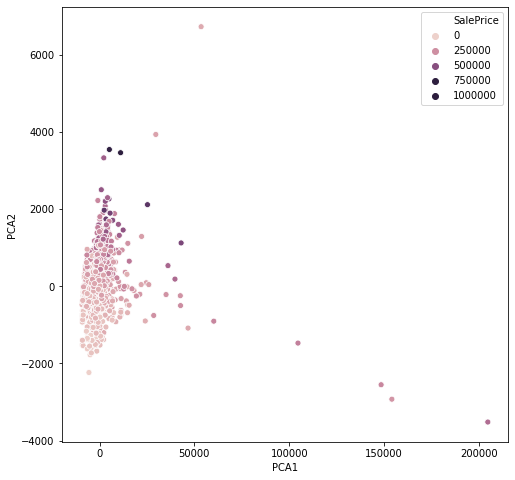

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1', 'PCA2'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA1", y="PCA2", hue=y,data=dfpca)
plt.show()

###Raking Features

In [ ]:
select_features1 = ['Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

select_features2 = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType']

select_features3 = ['HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2']
select_features4 = [ 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd']

In [ ]:
x=df[select_features1]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Create the RFE object and rank each variable
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Kept features: [False False False False False False  True False False False False False
 False False False False False False False  True False False]
Raking of the features: [11  6  3  5  7  2  1 15 12 14 10 16 13 17 19 18 20 21  4  1  9  8]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
x=df[select_features2]
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
x=df[select_features3] 
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Kept features: [False  True False False False False False False False False False False
 False False  True False False False False False]
Raking of the features: [ 4  1  3 10  8  9 17 11  7  6 18 13 15 16  1 14  2  5 19 12]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
x=df[select_features4]
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Kept features: [False False False False False False False False False False False False
 False False False False False  True  True]
Raking of the features: [16 15 12 13  6  9  7 11 17 18 14  3  8  2  5  4 10  1  1]


Se han dividido las features porqué no funcionaban todas juntas

In [ ]:
select_features=['YrSold','GarageCars','OverallQual','BsmtQual','KitchenQual', 'TotRmsAbvGrd']

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
x=df[select_features]
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Kept features: [False False  True False False  True]
Raking of the features: [2 4 1 3 5 1]


Con las columnas de OverallQual y TotRmsAbvGrd se simplificaria el modelo